In [6]:
import pandas as pd
import numpy as np
do = pd.read_csv('nilai.csv',delimiter=';')
print(do.head())
print(do.columns)
df=do.drop(columns=['NAMA'])
print(df.head())
print(df.columns)


                     NAMA  t1  t2  t3  q1  t4  t5  t6  q2  uts  uas
0    ADITYA PUTRA PRATAMA  90  90  90  90  90  85  90  59   75   70
1                AGTAMANN  80  90   0  85  90  85  90  39   88   80
2  AISIA ARRIFIANTY FAUZI  90  90  90  90  90  95  90  62   76   89
3        AJENG INDRASWARI  90  90  90  90  90  85  90  85   65   90
4            ANGGA RUBADY  90  90  80  90  90  90   0  68   78   89
Index(['NAMA', 't1', 't2', 't3', 'q1', 't4', 't5', 't6', 'q2', 'uts', 'uas'], dtype='object')
   t1  t2  t3  q1  t4  t5  t6  q2  uts  uas
0  90  90  90  90  90  85  90  59   75   70
1  80  90   0  85  90  85  90  39   88   80
2  90  90  90  90  90  95  90  62   76   89
3  90  90  90  90  90  85  90  85   65   90
4  90  90  80  90  90  90   0  68   78   89
Index(['t1', 't2', 't3', 'q1', 't4', 't5', 't6', 'q2', 'uts', 'uas'], dtype='object')


           t1        t2        t3        q1        t4        t5        t6  \
t1   1.000000 -0.088525  0.255999 -0.145384  0.377210  0.187772  0.236648   
t2  -0.088525  1.000000  0.416049 -0.031568  0.347552  0.156408  0.186140   
t3   0.255999  0.416049  1.000000 -0.011706  0.615362  0.360782  0.456534   
q1  -0.145384 -0.031568 -0.011706  1.000000  0.027824 -0.084223 -0.066667   
t4   0.377210  0.347552  0.615362  0.027824  1.000000  0.610176  0.695608   
t5   0.187772  0.156408  0.360782 -0.084223  0.610176  1.000000  0.397812   
t6   0.236648  0.186140  0.456534 -0.066667  0.695608  0.397812  1.000000   
q2  -0.043623 -0.060484 -0.070414  0.131508 -0.038608  0.084954 -0.222663   
uts  0.106738  0.031829 -0.024233 -0.182576  0.241088  0.296553  0.062973   
uas -0.028714  0.038771 -0.022236  0.010765  0.070575  0.131734 -0.111937   

           q2       uts       uas  
t1  -0.043623  0.106738 -0.028714  
t2  -0.060484  0.031829  0.038771  
t3  -0.070414 -0.024233 -0.022236  
q1   0.1

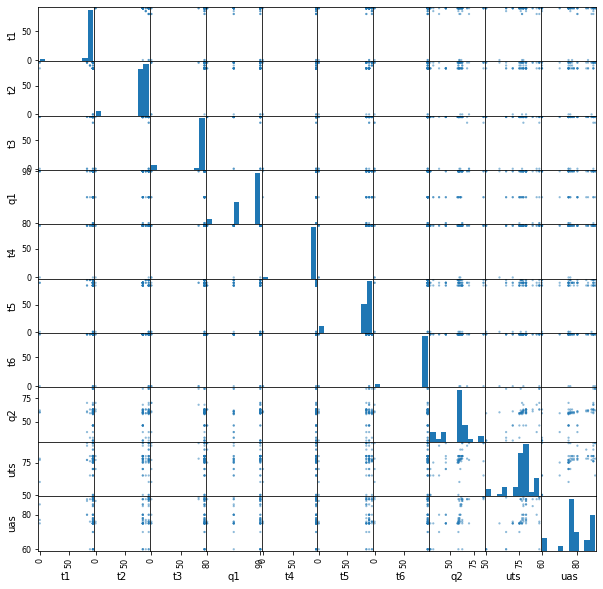

In [9]:
from array import array
from operator import itemgetter
from pandas.plotting import scatter_matrix

scatter_matrix(df[df.columns.values.tolist()], figsize=(10, 10),s=20)
print(df.corr(method ='pearson'))

dfcorr=df.corr(method ='pearson')
corrtable=[]
for i in df[df.columns.values]:
    for n in df[df.columns.values]:  
        corrtable.append([i,n,dfcorr[i][n]])
corrtable.sort(key=itemgetter(2), reverse=True)
for i in corrtable:
    print(i)


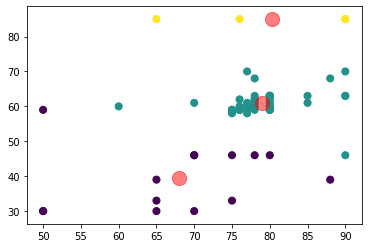

<Figure size 3600x3600 with 0 Axes>

0.5965931597250009


In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

X=df[['uts','q2']].values
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10,max_iter=300, tol=0.0001, precompute_distances='auto',verbose=0, 
                random_state=20, copy_x=True, n_jobs=None,algorithm='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red', s=200,alpha=0.5,zorder=10)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#for i,n in zip(X,do['NAMA']):
    #plt.text(i[0],i[1], n.split()[0])
plt.figure(figsize=(50,50))
plt.show()

print(metrics.silhouette_score(X,kmeans.labels_,metric='euclidean',sample_size=200))

                     NAMA  t1  t2  t3  q1  t4  t5  t6  q2  uts  uas
0    ADITYA PUTRA PRATAMA  90  90  90  90  90  85  90  59   75   70
1                AGTAMANN  80  90   0  85  90  85  90  39   88   80
2  AISIA ARRIFIANTY FAUZI  90  90  90  90  90  95  90  62   76   89
3        AJENG INDRASWARI  90  90  90  90  90  85  90  85   65   90
4            ANGGA RUBADY  90  90  80  90  90  90   0  68   78   89
Index(['NAMA', 't1', 't2', 't3', 'q1', 't4', 't5', 't6', 'q2', 'uts', 'uas'], dtype='object')


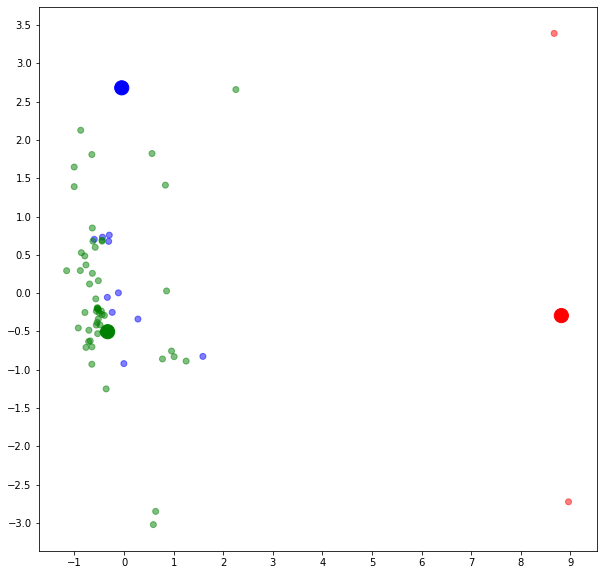

0.4538746773807293
                          nama  data_index  cluster
19                 EDI SUSANTO          19        0
16         DIMAZ JULIO PRATAMA          16        0
0         ADITYA PUTRA PRATAMA           0        1
36           IRVANUDDIN RAHMAN          36        1
37         JOEI ASTRA BRAHMANA          37        1
38                JOKO WILARDI          38        1
39              KARINA SAFITRI          39        1
40               KENNY ELLANTO          40        1
41             KHALIFAH AGAM S          41        1
42       LENDRA KUSUMA WARDOYO          42        1
43             LILIS SETYOWATI          43        1
44            MANDAR NUR ASLAM          44        1
45           MANIKAM DAMARJATI          45        1
46              MARSHA MOCHRAN          46        1
35               IQBAL HADIYAN          35        1
47             MASAYU MAYA P S          47        1
49         MUHAMMAD AZMI ARIEF          49        1
50          MUHAMMAD FACHRUL A          50   

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

do = pd.read_csv('nilai.csv',delimiter=';')
print(do.head())
print(do.columns)
df=do.drop(columns=['NAMA'])
X2 = df.values
X2_std = StandardScaler().fit_transform(X2)
#X2_std = X2
pca = PCA(n_components=3)
x_10d = pca.fit_transform(X2_std)

kmeans2 = KMeans(n_clusters = 3,init='k-means++', n_init=10,max_iter=300, tol=0.0001, precompute_distances='auto',verbose=0, 
                random_state=20, copy_x=True, n_jobs=None,algorithm='auto')

#Compute cluster centers and predict cluster indices
X_clustered = kmeans2.fit_predict(x_10d)
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
centers2=kmeans2.cluster_centers_
plt.figure(figsize = (10,10))

label_color2 = [LABEL_COLOR_MAP[l] for l in range(len(centers2))]
plt.scatter(centers2[:,0],centers2[:,1],c=label_color2, s=200,alpha=1,zorder=10)
plt.scatter(x_10d[:,0],x_10d[:,2], c= label_color, alpha=0.5)
#for i,n in zip(x_10d,do['NAMA']):
    #plt.text(i[0],i[2], n.split()[0])
#plt.axis(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.locator_params(tight=True, nbins=20)
plt.show()
print(metrics.silhouette_score(x_10d,kmeans2.labels_,metric='euclidean',sample_size=200))


cluster_map = pd.DataFrame()
cluster_map['nama']=do['NAMA']
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = kmeans2.labels_
print(cluster_map.sort_values(by=['cluster']))
